In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

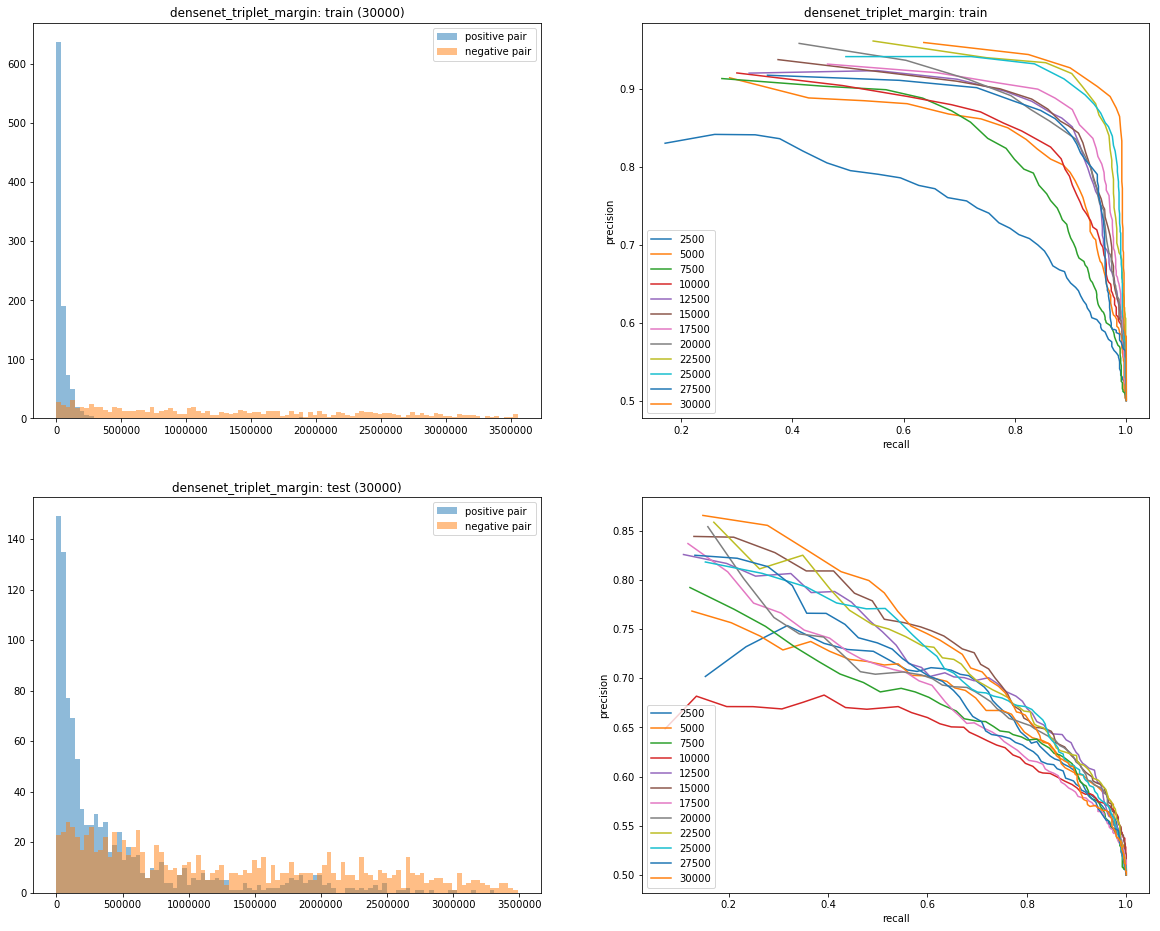

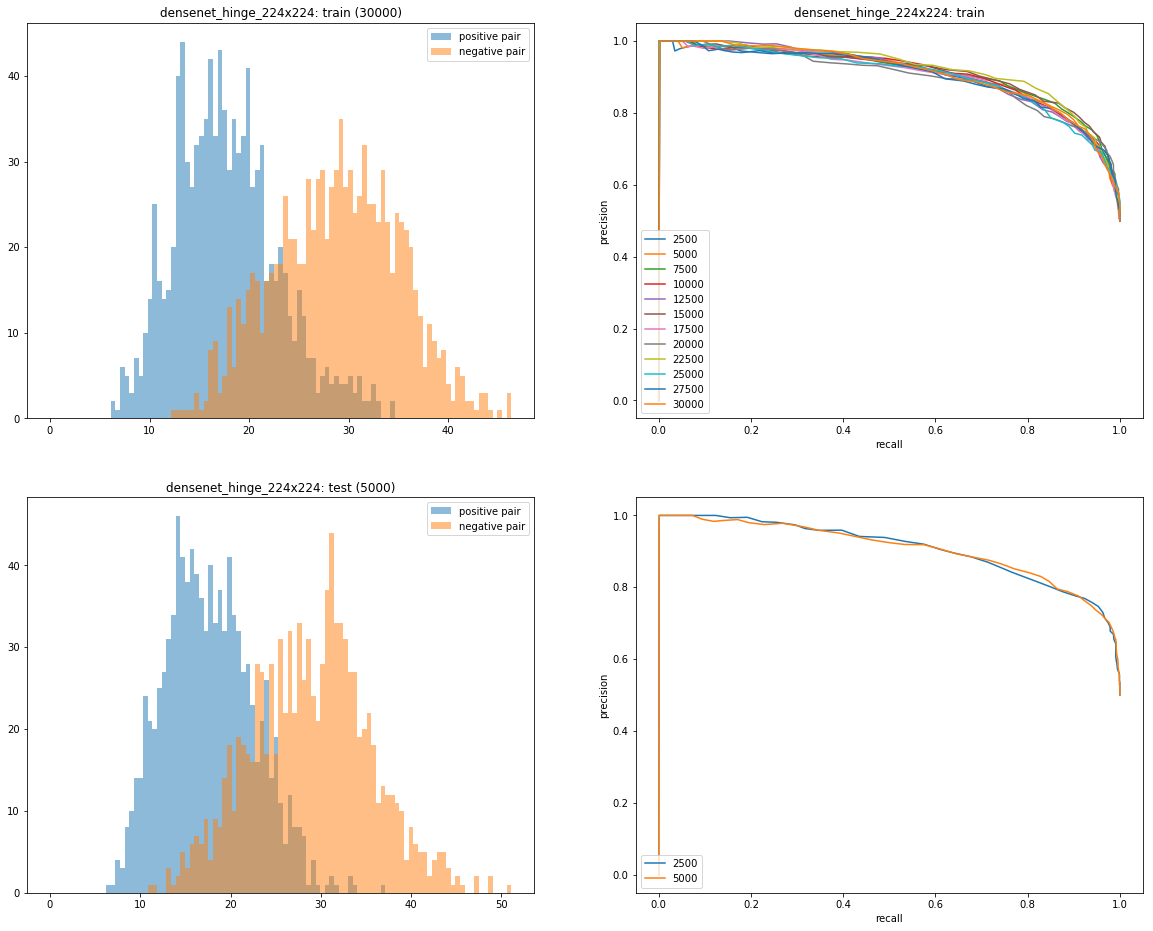

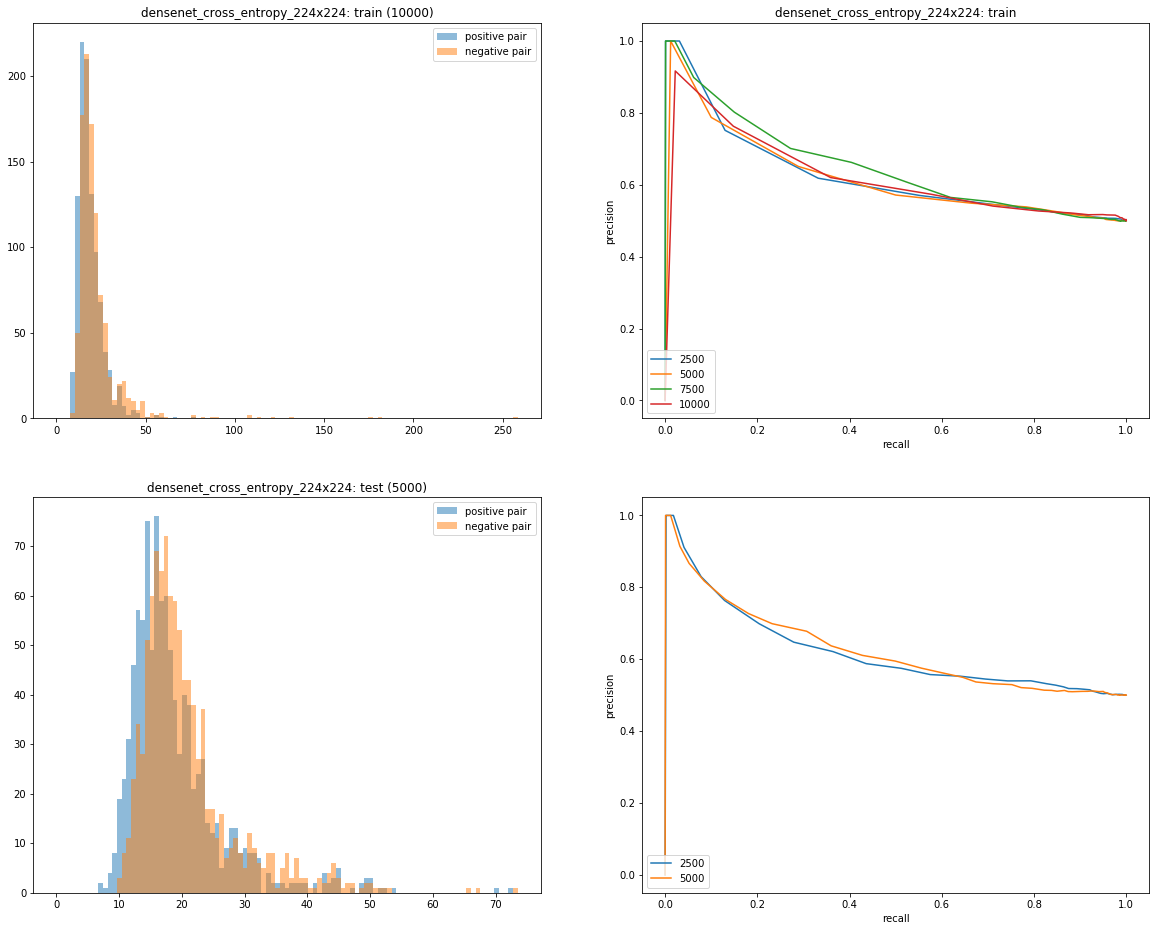

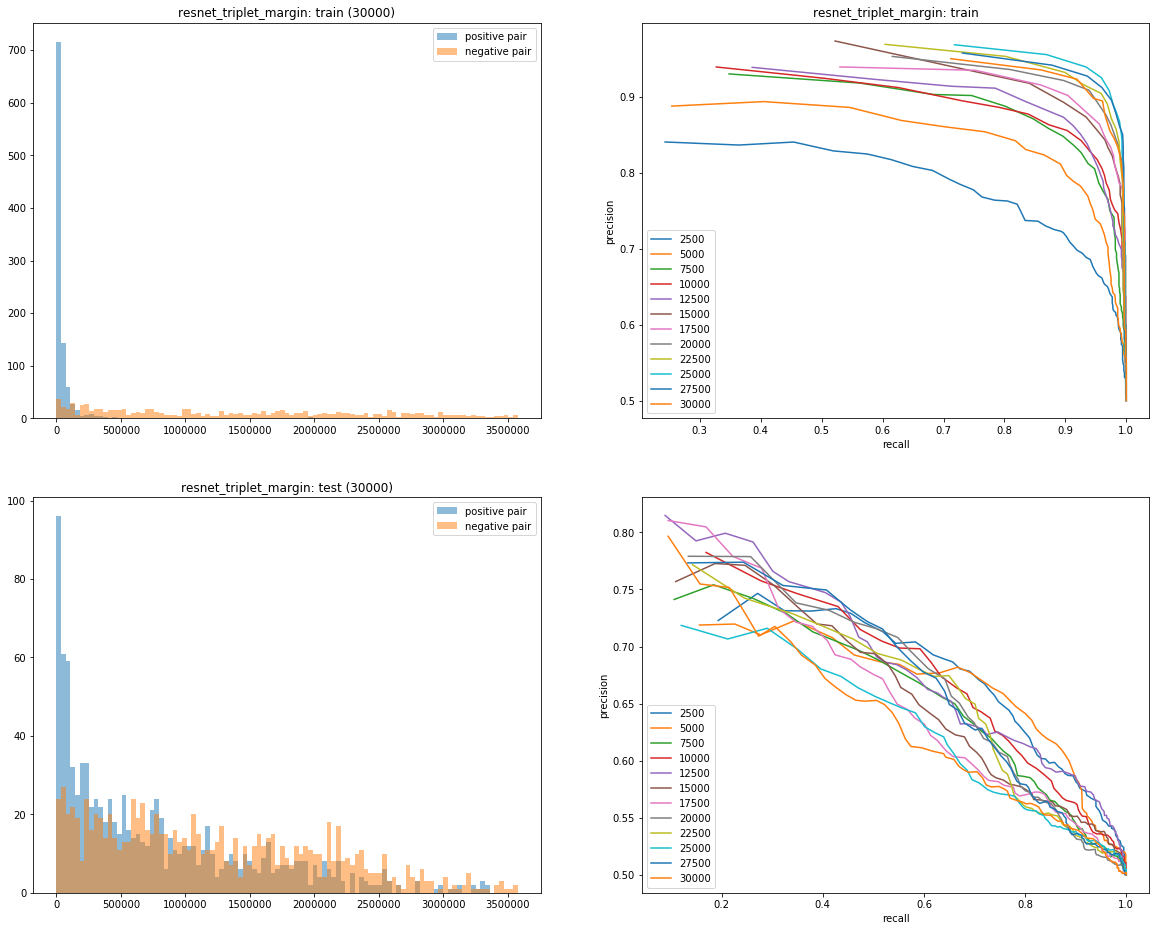

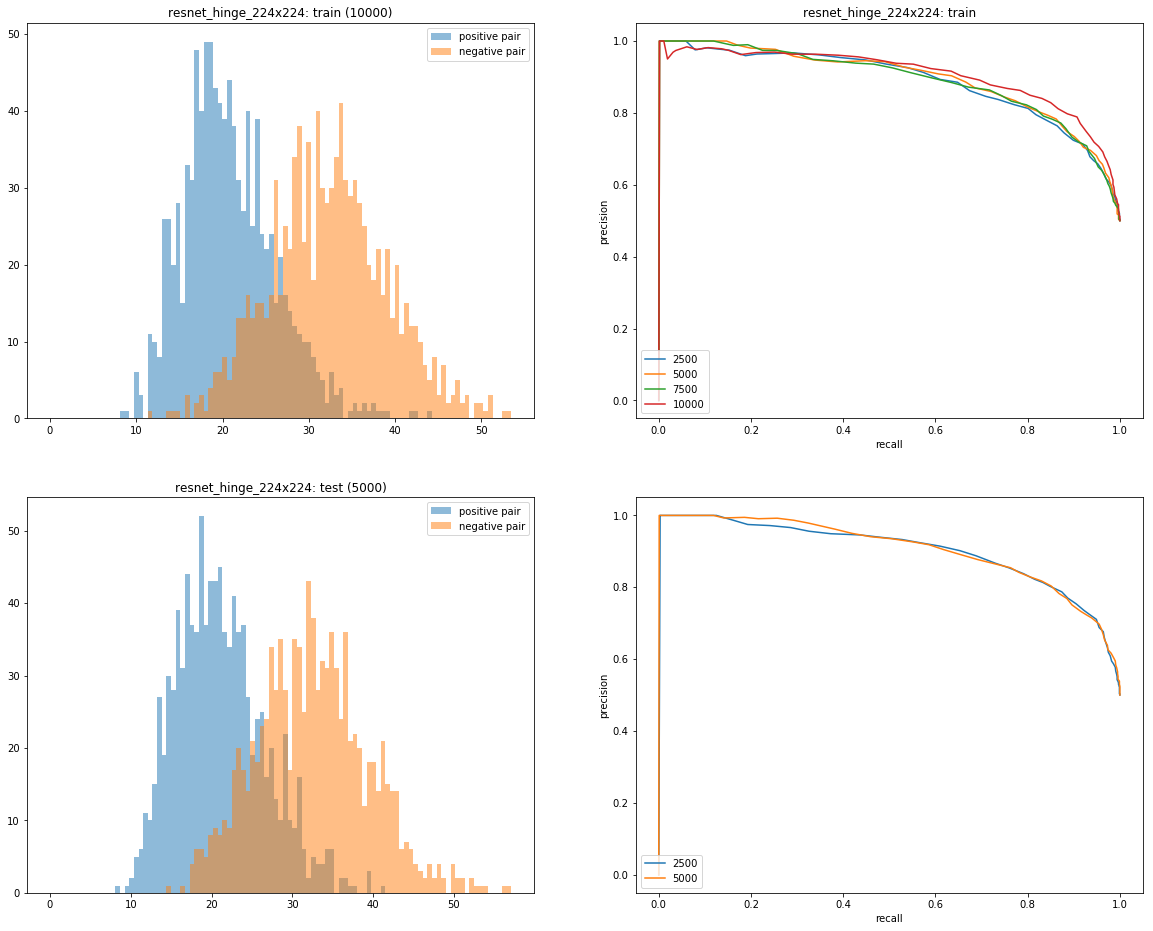

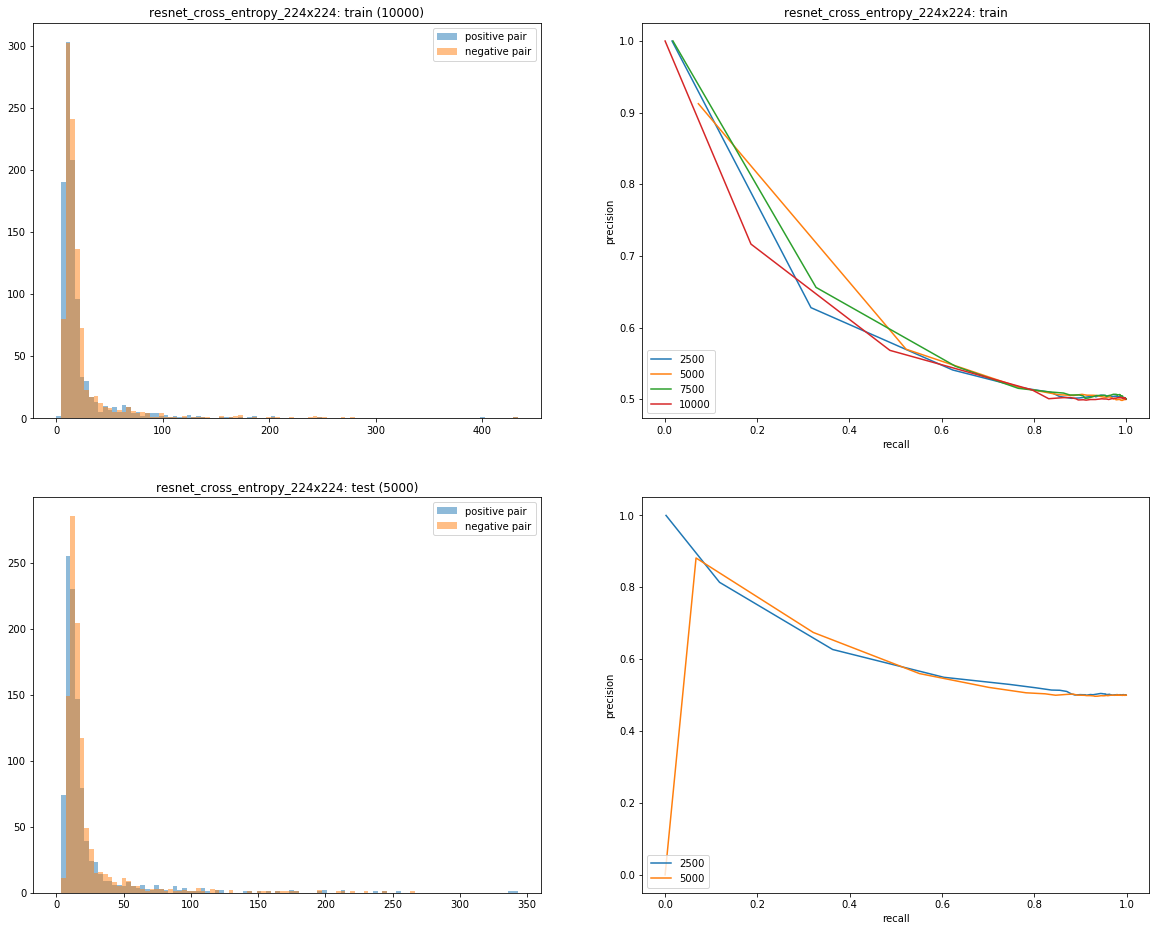

In [8]:
tensorflow_root = '/home/albert/github/tensorflow/models/'

for model_root in ['densenet_triplet_margin', 'densenet_hinge_224x224', 'densenet_cross_entropy_224x224', 
                   'resnet_triplet_margin', 'resnet_hinge_224x224', 'resnet_cross_entropy_224x224', ]:
    plt.figure(figsize=(20,16))
    
    train_score = np.load(tensorflow_root + '%s/%s_score.npz' % (model_root, model_root))['arr_0'].item()
    
    plt.subplot(2,2,1)
    last_iter_train_keys = train_score['pos_distance'].keys()
    last_iter_train_keys.sort()
    last_iter_train = last_iter_train_keys[-1]
    bins = np.linspace(0, np.max(np.array(train_score['pos_distance'][last_iter_train] + 
                                          train_score['neg_distance'][last_iter_train])), 100)
    plt.hist(train_score['pos_distance'][last_iter_train], bins, alpha=0.5, label='positive pair')
    plt.hist(train_score['neg_distance'][last_iter_train], bins, alpha=0.5, label='negative pair')
    plt.legend(loc='upper right')
    plt.gca().set_xlim(auto=True)
    plt.title('%s: train (%d)' % (model_root, last_iter_train))
    
    plt.subplot(2,2,2)
    for i in range(1, len(train_score['recall']) + 1):
        iterations = i * 2500
        plt.plot(train_score['recall'][iterations], train_score['precision'][iterations], label=str(iterations))
    plt.legend(loc='lower left')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('%s: train' % model_root)

    test_score = np.load(tensorflow_root + '%s/%s_test_score.npz' % (model_root, model_root))['arr_0'].item()
    
    plt.subplot(2,2,3)
    last_iter_test_keys = test_score['pos_distance'].keys()
    last_iter_test_keys.sort()
    last_iter_test = last_iter_test_keys[-1]
    bins = np.linspace(0, np.max(np.array(test_score['pos_distance'][last_iter_test] + 
                                          test_score['neg_distance'][last_iter_test])), 100)
    plt.hist(test_score['pos_distance'][last_iter_test], bins, alpha=0.5, label='positive pair')
    plt.hist(test_score['neg_distance'][last_iter_test], bins, alpha=0.5, label='negative pair')
    plt.legend(loc='upper right')
    plt.gca().set_xlim(auto=True)
    plt.title('%s: test (%d)' % (model_root, last_iter_test))
    
    plt.subplot(2,2,4)
    for i in range(1, len(test_score['recall']) + 1):
        iterations = i * 2500
        plt.plot(test_score['recall'][iterations], test_score['precision'][iterations], label=str(iterations))
    plt.legend(loc='lower left')
    plt.xlabel('recall')
    plt.ylabel('precision')
    
    plt.show()

In [ ]:
m = 12
for r in range(1,m + 1):
    iterations = r * 2500
    pos_distance = score['pos_distance'][iterations]
    neg_distance = score['neg_distance'][iterations]
    
    plt.figure(figsize=(20,5))
    plt.subplot(1,3, 1)
    bins = np.linspace(0, np.max(np.array(pos_distance + neg_distance)), 100)
    plt.hist(score['pos_distance'][iterations], bins, alpha=0.5, label='positive pair')
    plt.hist(score['neg_distance'][iterations], bins, alpha=0.5, label='negative pair')
    plt.legend(loc='upper right')
    plt.title('triplet margin %d' % iterations)

    plt.subplot(1,3, 2)
    plt.plot(score['recall'][iterations], score['precision'][iterations])
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('triplet margin %d' % iterations)

    plt.subplot(1,3, 3)
    plt.plot(np.linspace(0, np.max(np.array(pos_distance + neg_distance)), 101)[1:], 
             score['matt_coef'][iterations])
    plt.xlabel('dist')
    plt.ylabel('matt_coef')
    plt.title('triplet margin %d' % iterations)

    plt.show()